# <center>House Price Prediciton</center>

### Importing the modules


In [38]:
import pandas as pd
import numpy as np
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
%matplotlib inline
plt.style.use('bmh')

In [19]:
os.chdir('/Users/jparmar/Documents/Kaggle_datasets/house-prices-advanced-regression-techniques')
try:
    train = pd.read_csv('train.csv') #trying to open csv file using pd.read_csv
except FileNotFoundError:
    zip_file = zipfile.Zipfile('/Users/jparmar/Documents/Kaggle_datasets/house-prices-advanced-regression-techniques.zip')
    train = pd.read_csv(zip_file.open('train.csv'))

In [5]:
print(type(train))
print(train.shape)

<class 'pandas.core.frame.DataFrame'>
(1460, 81)


In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Analysing the dependant variable i.e. SalePrice 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


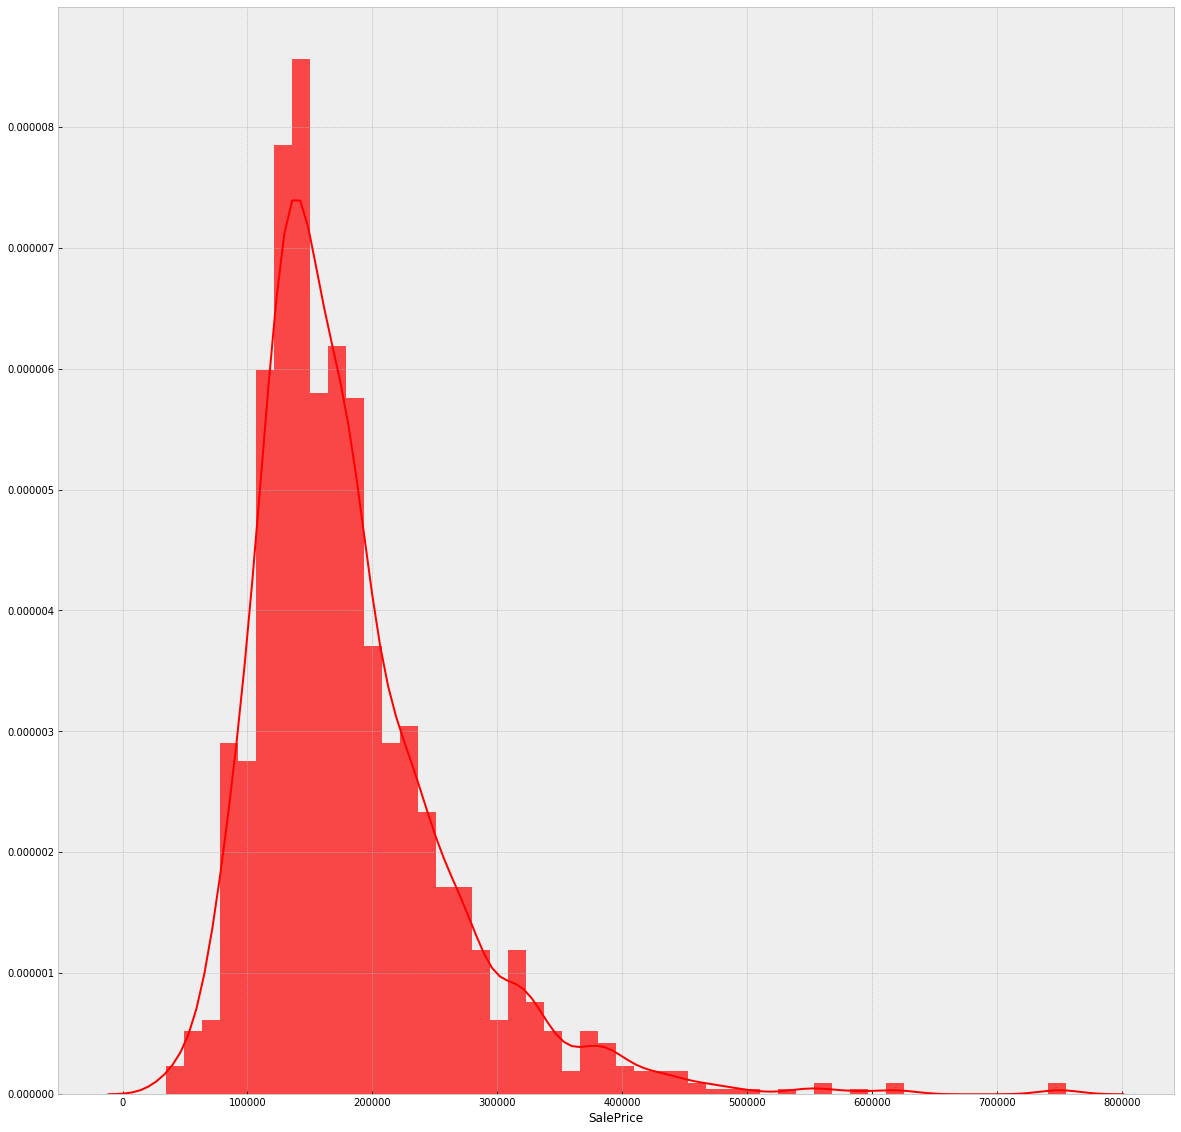

In [11]:
print(train.SalePrice.describe())
plt.figure(figsize=(20,20))
sns.distplot(train.SalePrice,color='r', bins=50, hist_kws={'alpha':0.7})

# Distribution plot
It is not normally distributed it is skewed on the left. Would be a good idea to check Skewness and Kurtosis.

Skewness: It is the measure of symmetry. Whether your data is evenly spread on both left and right of the center.

Kurtosis: Measure of data on tail of distribution.

In [12]:
print('Skewness: {}'.format(round(train.SalePrice.skew(),3)))
print('Kurtosis: {}'.format(round(train.SalePrice.kurt(),3)))

Skewness: 1.883
Kurtosis: 6.536


Checking the realtionship between dependant variable with independant variables. Checking the datatypes of all the features

In [13]:
set(train.dtypes.to_list())

{dtype('int64'), dtype('float64'), dtype('O')}

extracting all the features which are integers and float

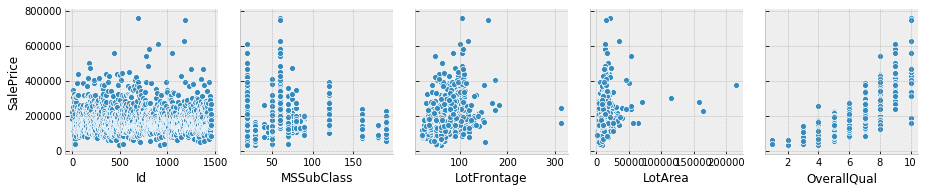

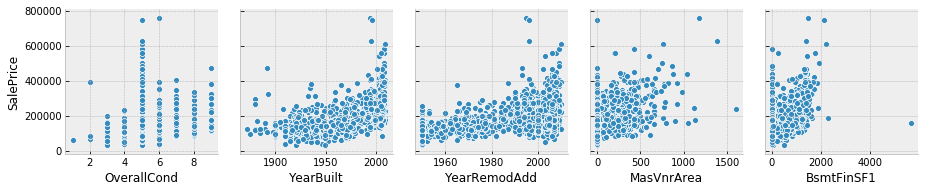

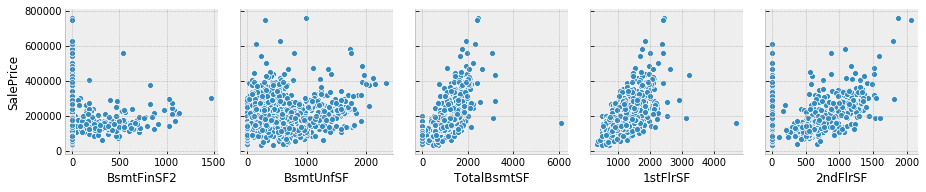

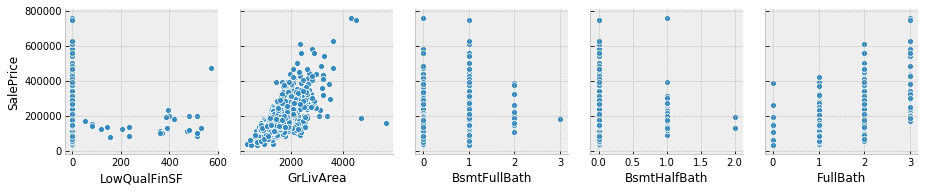

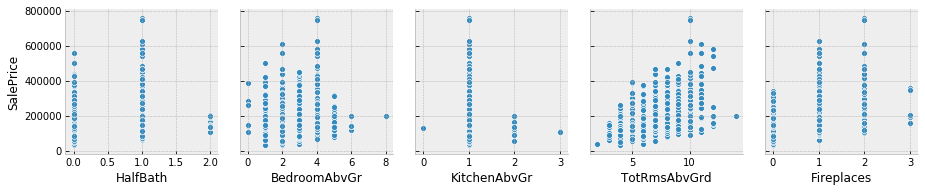

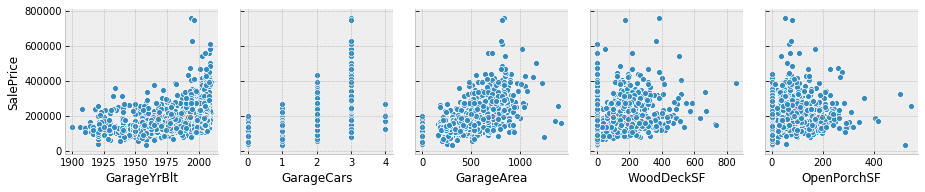

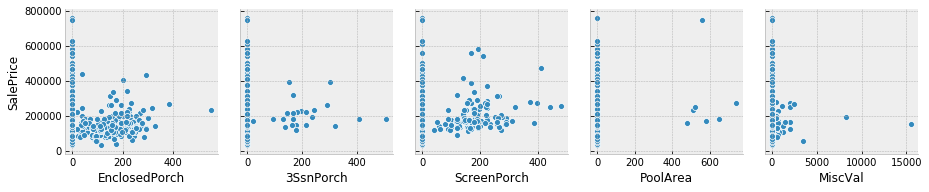

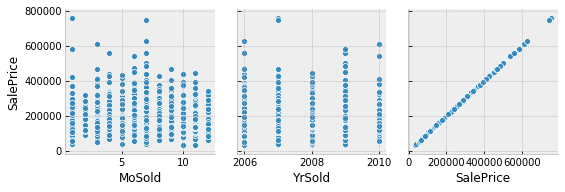

In [14]:
train_corr = train.select_dtypes(include = ['int64','float64'])
for i in range(0, len(train_corr.columns),5):
    sns.pairplot(train_corr,
                x_vars=train_corr.columns[i:i+5],
                y_vars=['SalePrice'])

From the figures it can be seen that features that have linear relationships are : 
    ['1stFlrSF','GrLivArea']

In [15]:
train_corr1 = train_corr.corr()['SalePrice'][1:-1]
golden_features = train_corr1[abs(train_corr1)>0.5].sort_values(ascending=False)
print('These are top {} features with dependant variable\n{}'.format(len(golden_features), golden_features))

These are top 10 features with dependant variable
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Creating the visual correlation matrix

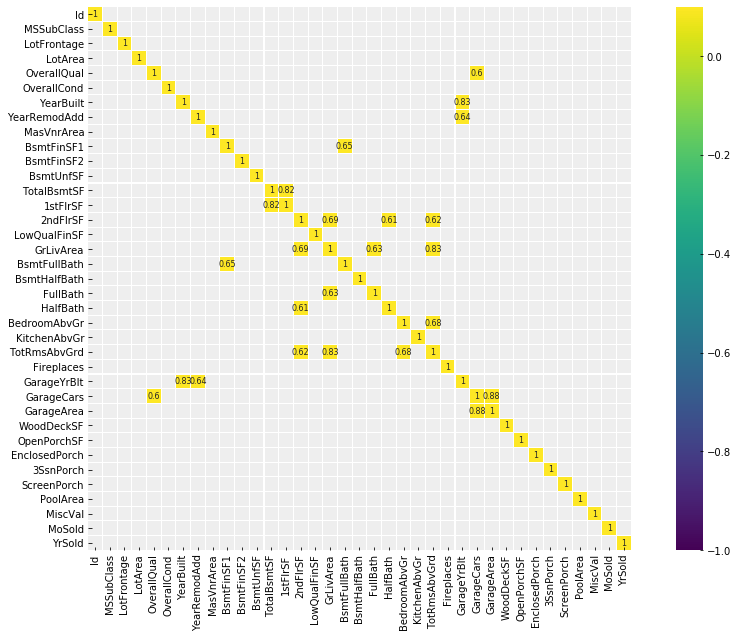

In [16]:
train_corr1 = train_corr.drop('SalePrice', axis=1).corr()
plt.figure(figsize=(16,10))
sns.heatmap(train_corr1[(train_corr1>=0.6)|(train_corr1<=-0.6)], 
            cmap='viridis', 
            vmax=0.1, 
            vmin=-1.0, 
            linewidth=0.1,
            annot=True, 
            annot_kws={"size":8}, 
            square=True)

# <center>Data Manipulation</center> 

In [37]:
missing = pd.concat([train.isnull().sum().sort_values(ascending=False),
                        round((train.isnull().sum()/train.isnull().count())*100,2).sort_values(ascending=False)],axis=1, keys = ['count', 'percentage'])
missing['percentage']=missing['percentage'].astype(str) + '%'
missing.head(20)

,count,percentage
PoolQC,1453,99.52%
MiscFeature,1406,96.3%
Alley,1369,93.77%
Fence,1179,80.75%
FireplaceQu,690,47.26%
LotFrontage,259,17.74%
GarageCond,81,5.55%
GarageType,81,5.55%
GarageYrBlt,81,5.55%
GarageFinish,81,5.55%


In [39]:
train1 = train[[c for c in train if train[c].count()/len(train)<=0.3]]
print('columns that can be deleted due to more than 70% of null values are {}'.format(list(train1)))
col = list(train1.columns)
train = train.drop(col, axis=1)
del train1, col


columns that can be deleted due to more than 70% of null values are ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


In [43]:
list(set(train.dtypes.to_list()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [49]:
train_num = train.select_dtypes(include = ['float64','int64'])
train_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [68]:
individual_features_df=[]
for i in range(0,len(train_num.columns)-1):
    tmpDf = train_num[[train_num.columns[i], 'SalePrice']]
    tmpDf = train_num[train_num[train_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)
    

[        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
 0        1          60         65.0     8450            7            5   
 1        2          20         80.0     9600            6            8   
 2        3          60         68.0    11250            7            5   
 3        4          70         60.0     9550            7            5   
 4        5          60         84.0    14260            8            5   
 ...    ...         ...          ...      ...          ...          ...   
 1455  1456          60         62.0     7917            6            5   
 1456  1457          20         85.0    13175            6            6   
 1457  1458          70         66.0     9042            7            9   
 1458  1459          20         68.0     9717            5            6   
 1459  1460          20         75.0     9937            5            6   
 
       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
 0          2003 

In [179]:
import urllib.request
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
holidays = requests.get('https://www.timeanddate.com/holidays/canada/')
soup = BeautifulSoup(holidays.text, 'html.parser')
#table = soup.find_all('td')

In [283]:
for table_data in soup.find_all(href=True):
     print(table_data)

<link as="font" crossorigin="" href="/common/fonts/iconfont.woff2?v7" rel="preload" type="font/woff2"/>
<link crossorigin="" href="https://c.tadst.com" rel="preconnect"/>
<link as="script" href="/common/prebidtadoneall_3.js" rel="preload"/>
<link as="script" href="/common/prebidtadoneall_3.js" rel="preload"/>
<link href="https://www.timeanddate.de/feiertage/kanada/" hreflang="de" rel="alternate">
<link href="https://www.timeanddate.no/merkedag/canada/" hreflang="no" rel="alternate"><link href="/site.webmanifest" rel="manifest"/><link href="/favicon-48x48.png" rel="icon" sizes="48x48" type="image/png"/><link href="/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/><link href="/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link href="/common/global_104.css" rel="stylesheet" type="text/css"/><link href="/common/index_holiday_8.css" rel="stylesheet" type="text/css"/><link href="/common/articles_37.css" rel="stylesheet" type="text/css"/><style>.layout-grid{displ

In [281]:
data1 = [item.text for item in soup.select("th.nw")]
data2 = [item.text for item in soup.select("td.nw")]
data3 = [item.text for item in soup.select("td")]

In [282]:
data3

['Wednesday',
 "New Year's Day",
 'National holiday',
 '\xa0',
 'Thursday',
 'Day After New Year’s Day',
 'Local holiday',
 'Quebec',
 'Monday',
 'Epiphany',
 'Observance, Christian',
 '\xa0',
 'Tuesday',
 'Orthodox Christmas Day',
 'Orthodox',
 '\xa0',
 'Tuesday',
 'Orthodox New Year',
 'Orthodox',
 '\xa0',
 'Saturday',
 'Chinese New Year',
 'Observance',
 '\xa0',
 'Sunday',
 'Groundhog Day',
 'Observance',
 '\xa0',
 'Monday',
 "Tu B'Shevat (Arbor Day)",
 'Jewish holiday',
 '\xa0',
 'Friday',
 "Valentine's Day",
 'Observance',
 '\xa0',
 'Saturday',
 'National Flag of Canada Day',
 'Observance',
 '\xa0',
 'Monday',
 'Islander Day',
 'Common local holiday',
 'PE',
 'Monday',
 'Family Day',
 'Common local holiday',
 'AB, BC, NB, ON, SK',
 'Monday',
 'Nova Scotia Heritage Day',
 'Common local holiday',
 'Nova Scotia',
 'Monday',
 'Louis Riel Day',
 'Common local holiday',
 'Manitoba',
 'Friday',
 'Yukon Heritage Day',
 'Local de facto holiday',
 'Yukon',
 'Tuesday',
 'Carnival / Shrove Tu

In [278]:
df1 = pd.DataFrame({'data1': data1, 'data2':data2})
df1

,data1,data2
0,Jan 1,Wednesday
1,Jan 2,Thursday
2,Jan 6,Monday
3,Jan 7,Tuesday
4,Jan 14,Tuesday
5,Jan 25,Saturday
6,Feb 2,Sunday
7,Feb 10,Monday
8,Feb 14,Friday
9,Feb 15,Saturday


In [228]:
data1 = [item.text for item in soup.select("tr.showrow")]
data1

[]

In [242]:
soup = BeautifulSoup(holidays.text, 'html.parser')
soup

<!DOCTYPE html>
<!--
scripts and programs that download content transparent to the user are not allowed without permission
--><html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>Holidays and observances in Canada in 2020</title><meta content="Overview of holidays and many observances in Canada during the year 2020" name="description"/><meta content="holidays,holiday,observance,observation,obseranse,holyday,day,off,free,work,2020,Canada" name="keywords"/><meta content="https://www.timeanddate.com/scripts/cityog.php?title=Holidays%20%26%20Observations&amp;tint=0xB53E38&amp;country=2020&amp;state=Canada&amp;image=ottawa1" property="og:image"/><meta content="website" property="og:type"/><style>
@font-face{font-family:iconfont;src:url("/common/fonts/iconfont.woff2?v7") format("woff2"),url("/common/fonts/iconfont.woff?v7") format("woff"),url("/common/fonts/iconfont.ttf?v7") format("truetype"),url("/common/fonts/iconfont.svg?v7#iconfont") format("s

In [273]:

a=[]
for i in range(1,129):
    row = 'tr'+ str(i)
    for table_data in soup.find_all('tr', {'id': row}):
        a.append(table_data.select("td")[].decode_contents())
    

IndexError: list index out of range

In [280]:
data3

[]